<h1 style="text-align: center; 
           border-radius: 12px; 
           padding: 25px; 
           margin: 0; 
           font-size: 200%; 
           font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
           background-color: #28527a; 
           color: #ffffff; 
           box-shadow: 0 8px 16px rgba(0, 0, 0, 0.2); 
           border: 2px solid #d1d9e6;">   
    Diabetes Prediction: From Logistic Regression to Advanced Ensemble Methods
</h1>


![diabetes](https://i.postimg.cc/d3P0gW3k/2306-q702-003-S-m005-c13-diabetes.jpg)

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    Table of Contents
</h2>

- <a href="#intro">1. Introduction</a>
- <a href="#libraries">2. Importing Required Libraries</a>
- <a href="#data">3. Reading and Understanding Data</a>
- <a href="#eda">4. Exploratory Data Analysis</a>
    - <a href="#zero">4.1. Exploring and Dealing with Zeros</a>
    - <a href="#feat">4.2. Distribution of Features</a>  
    - <a href="#corr">4.3. Exploring Correlations</a>
    - <a href="#outliers">4.4. Exploring Outliers</a>    
    - <a href="#target">5.5. Distribution of a Target Variable</a> 
- <a href="#prepr">5. Data Preprocessing</a>
    - <a href="#sep">5.1. Separate Features and Target</a>
    - <a href="#split">5.2. Train / Test Split</a>
    - <a href="#scale">5.3. Data Scaling</a>
- <a href="#ml">6. Modeling</a> 
    - <a href="#lr">6.1. Logistic Regression</a>
    - <a href="#knn">6.2. KNeighbors Classifier</a>
    - <a href="#gbc">6.3. Gradient Boosting Classifier</a>
    - <a href="#cbc">6.4. CatBoost Classifier</a>
    - <a href="#stacking">6.5. Combining Models with Stacking Classifier </a>
- <a href="#conclusions">7. Conclusions</a>

<a id="intro"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    1. Introduction 
</h2> 

### About Dataset
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

### About Project
To analyze the data, we will leverage several popular Python packages for data science. Initially, pandas will be used to read and manipulate the data stored in a CSV file. With pandas and numpy, we will explore the dataset, examine its columns, and uncover relationships between various features. The data will then undergo cleaning and preparation for classification models, addressing missing values, outliers, and ensuring proper data types. 

For visualizations, seaborn and matplotlib will be employed to create informative plots that illustrate data distributions and feature relationships.

For the classification models, we will try and compare different algorithms, ranging from Logistic Regression to CatBoost Classifier. Logistic Regression will be chosen for its interpretability and effectiveness with binary outcomes, while K-Nearest Neighbors (KNN) will be selected for its simplicity and non-parametric nature. We will also include more advanced models like Gradient Boosting and CatBoost Classifier to leverage their ability to handle complex relationships in the data.

These models will be evaluated using comprehensive classification reports that include metrics such as accuracy, precision, recall, and F1 score. By comparing the performance of these various models, we aim to identify the most accurate and reliable model for predicting diabetes based on the provided dataset.

By combining these tools and approaches, we aim to develop robust models that provide valuable insights and predictions.

<a id="libraries"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    2. Importing Required Libraries
</h2> 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

sns.set_theme(context='notebook', palette='muted', style='white')

<a id="data"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    3. Reading and Understanding our Data
</h2> 

In [ ]:
diabetes = pd.read_csv("diabetes2.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>There are <strong>9 numerical columns</strong>, which are easily comprehensible by their names. Among them:
            <ul style="margin-top: 8px; padding-left: 20px;">
                <li><strong>Pregnancies:</strong> Number of pregnancies, ranging from 0 to 17.</li>
                <li><strong>Age:</strong> Values range from 21 to 81 years.</li>
                <li><strong>Diabetes Pedigree Function (DPF):</strong> Measures diabetes likelihood based on age and family history.</li>
                <li><strong>BMI:</strong> Body Mass Index.</li>
                <li><strong>Outcome:</strong> Indicates if a person has diabetes (1) or not (0).</li>
            </ul>
        </li>
        <li>The dataset contains <strong>768 non-null rows.</strong></li>
        <li>Minimum values in several columns are <strong>0s,</strong> which are implausible (e.g., glucose or blood pressure cannot be 0).</li>
    </ul>
</div>

<a id="eda"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    4. Exploratory Data Analysis
</h2> 

<a id="zero"></a>
### 4.1. Exploring and Dealing with Zeros

In [6]:
diabetes[diabetes['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
diabetes[diabetes['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [8]:
diabetes[diabetes['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [9]:
diabetes[diabetes['BloodPressure'] == 0].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>If a person has zero insulin, they are diabetic because their cells can't transport glucose from the bloodstream into the cells. However, in our dataset, not all zeros in the Insulin column correspond to an Outcome of 1, indicating diabetes. This suggests that many zeros in the Insulin column are actually wrong values.</li>
        <li>And it looks like there are a lot of rows that have zeros in all 3 columns: Blood Pressure, Skin Thickness and Insulin. Let's visualize them.</li>
    </ul>
</div>

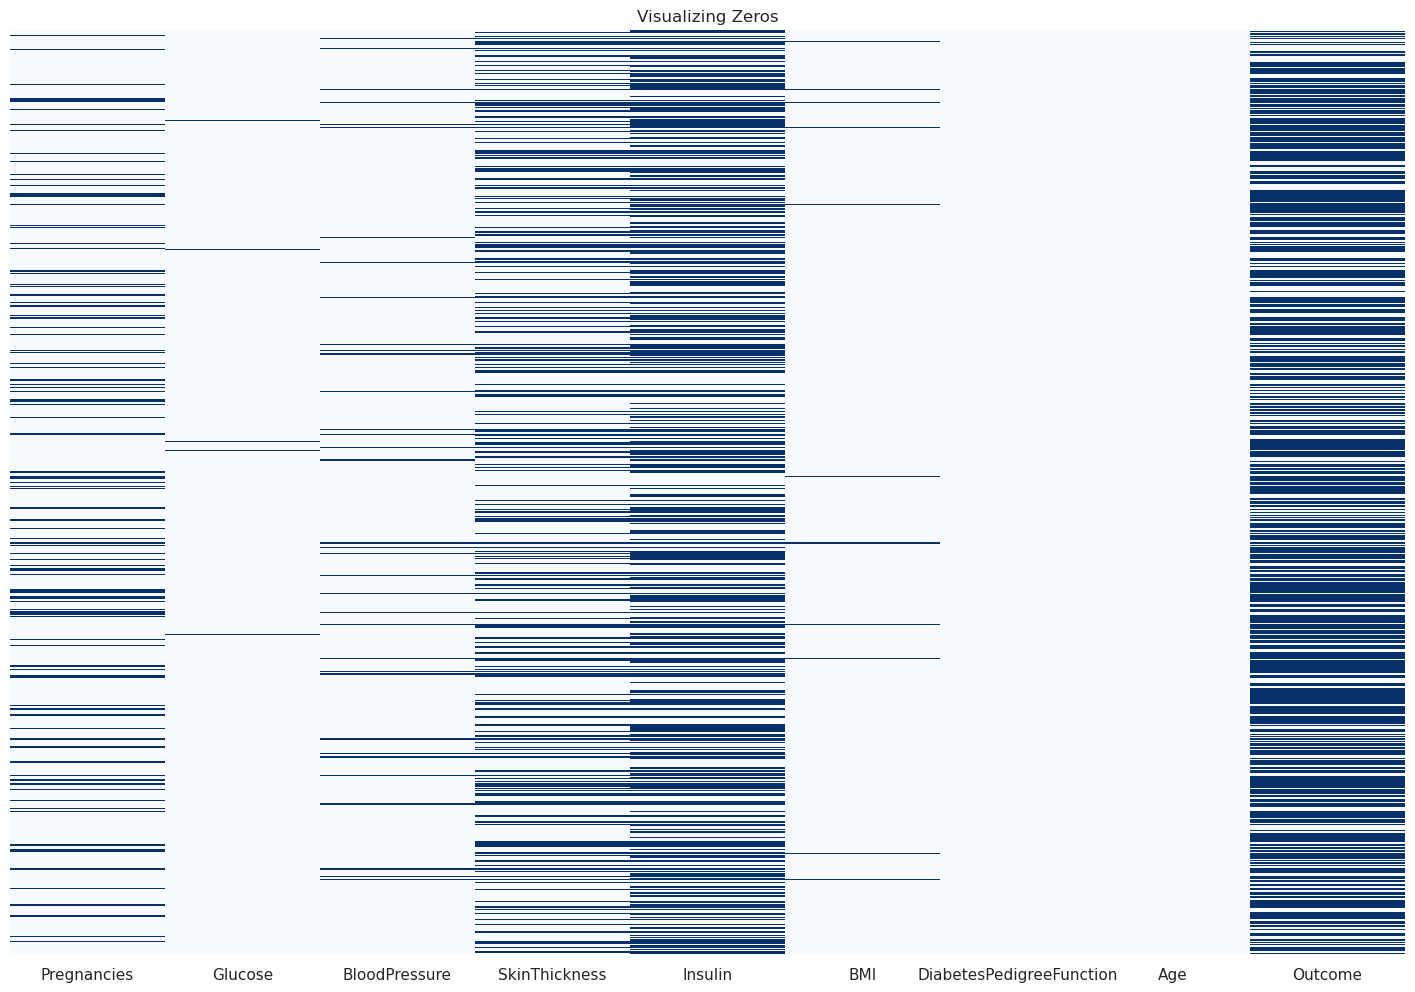

In [10]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Zeros")
sns.heatmap(diabetes==0, cbar=False, cmap='Blues', yticklabels=False);

<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>Zeros in <strong>outcomes</strong> and <strong>pregnancies</strong> are acceptable.</li>
        <li><strong>Glucose</strong> contains a few random rows with zeros.</li>
        <li>The same rows with zeros in <strong>Glucose</strong> also have zeros for <strong>Blood Pressure, Skin Thickness, Insulin,</strong> and <strong>BMI</strong>. Among these:
            <ul style="margin-top: 8px; padding-left: 20px;">
                <li><strong>Insulin</strong> has the highest number of zeros.</li>
                <li><strong>BMI</strong> has the fewest zeros.</li>
            </ul>
        </li>
    </ul>
</div>

#### Remove rows with zeros in Glucose, Blood Pressure and BMI columns (where the count of missing values is not high).

In [11]:
diabetes_cleaned = diabetes.loc[(diabetes[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]

#### Replace zeros in Skin Thickness column for an average of the column.

In [12]:
diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'] = diabetes_cleaned['SkinThickness'].mean()

#### Replace Insulin column for InsulinKnown.

In [13]:
diabetes_cleaned.loc[(diabetes_cleaned['Insulin'] != 0), 'InsulinKnown'] = 1
diabetes_cleaned.loc[(diabetes_cleaned['Insulin'] == 0), 'InsulinKnown'] = 0

In [14]:
diabetes_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'InsulinKnown'],
      dtype='object')

In [15]:
# reorder columns (with Outcome in the end)
diabetes_cleaned = diabetes_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'InsulinKnown', 'Outcome']]

#### Visualize zeros after data cleaning.

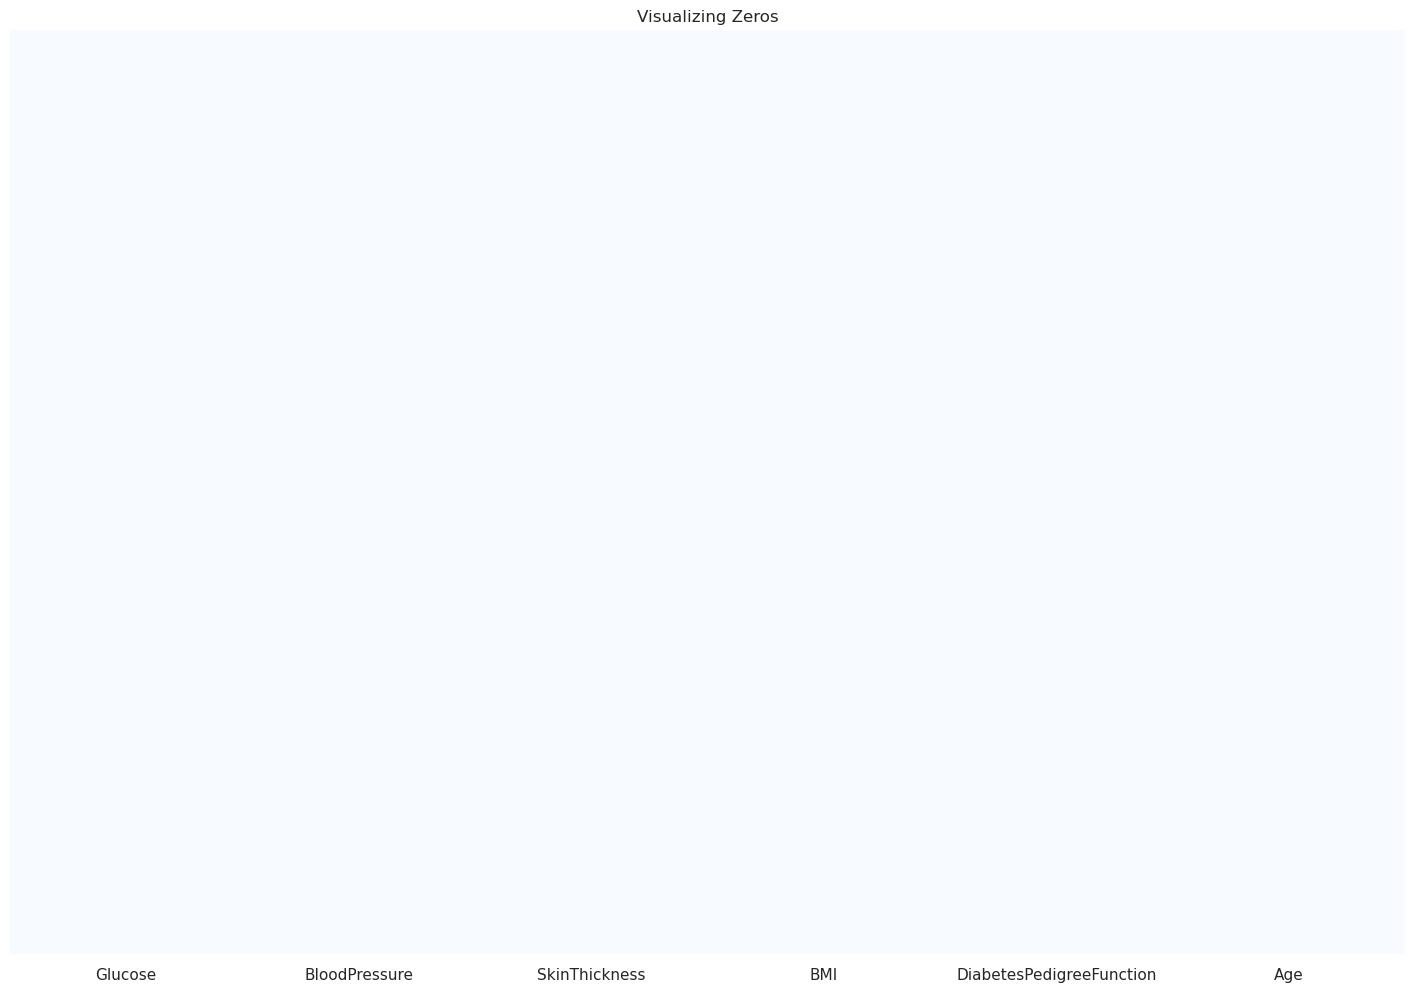

In [16]:
columns_to_viz = diabetes_cleaned[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
plt.figure(figsize=(18,12))
plt.title("Visualizing Zeros")
sns.heatmap(columns_to_viz==0, cbar=False, cmap='Blues', yticklabels=False);

<a id="feat"></a>
### 4.2. Distribution of Features 

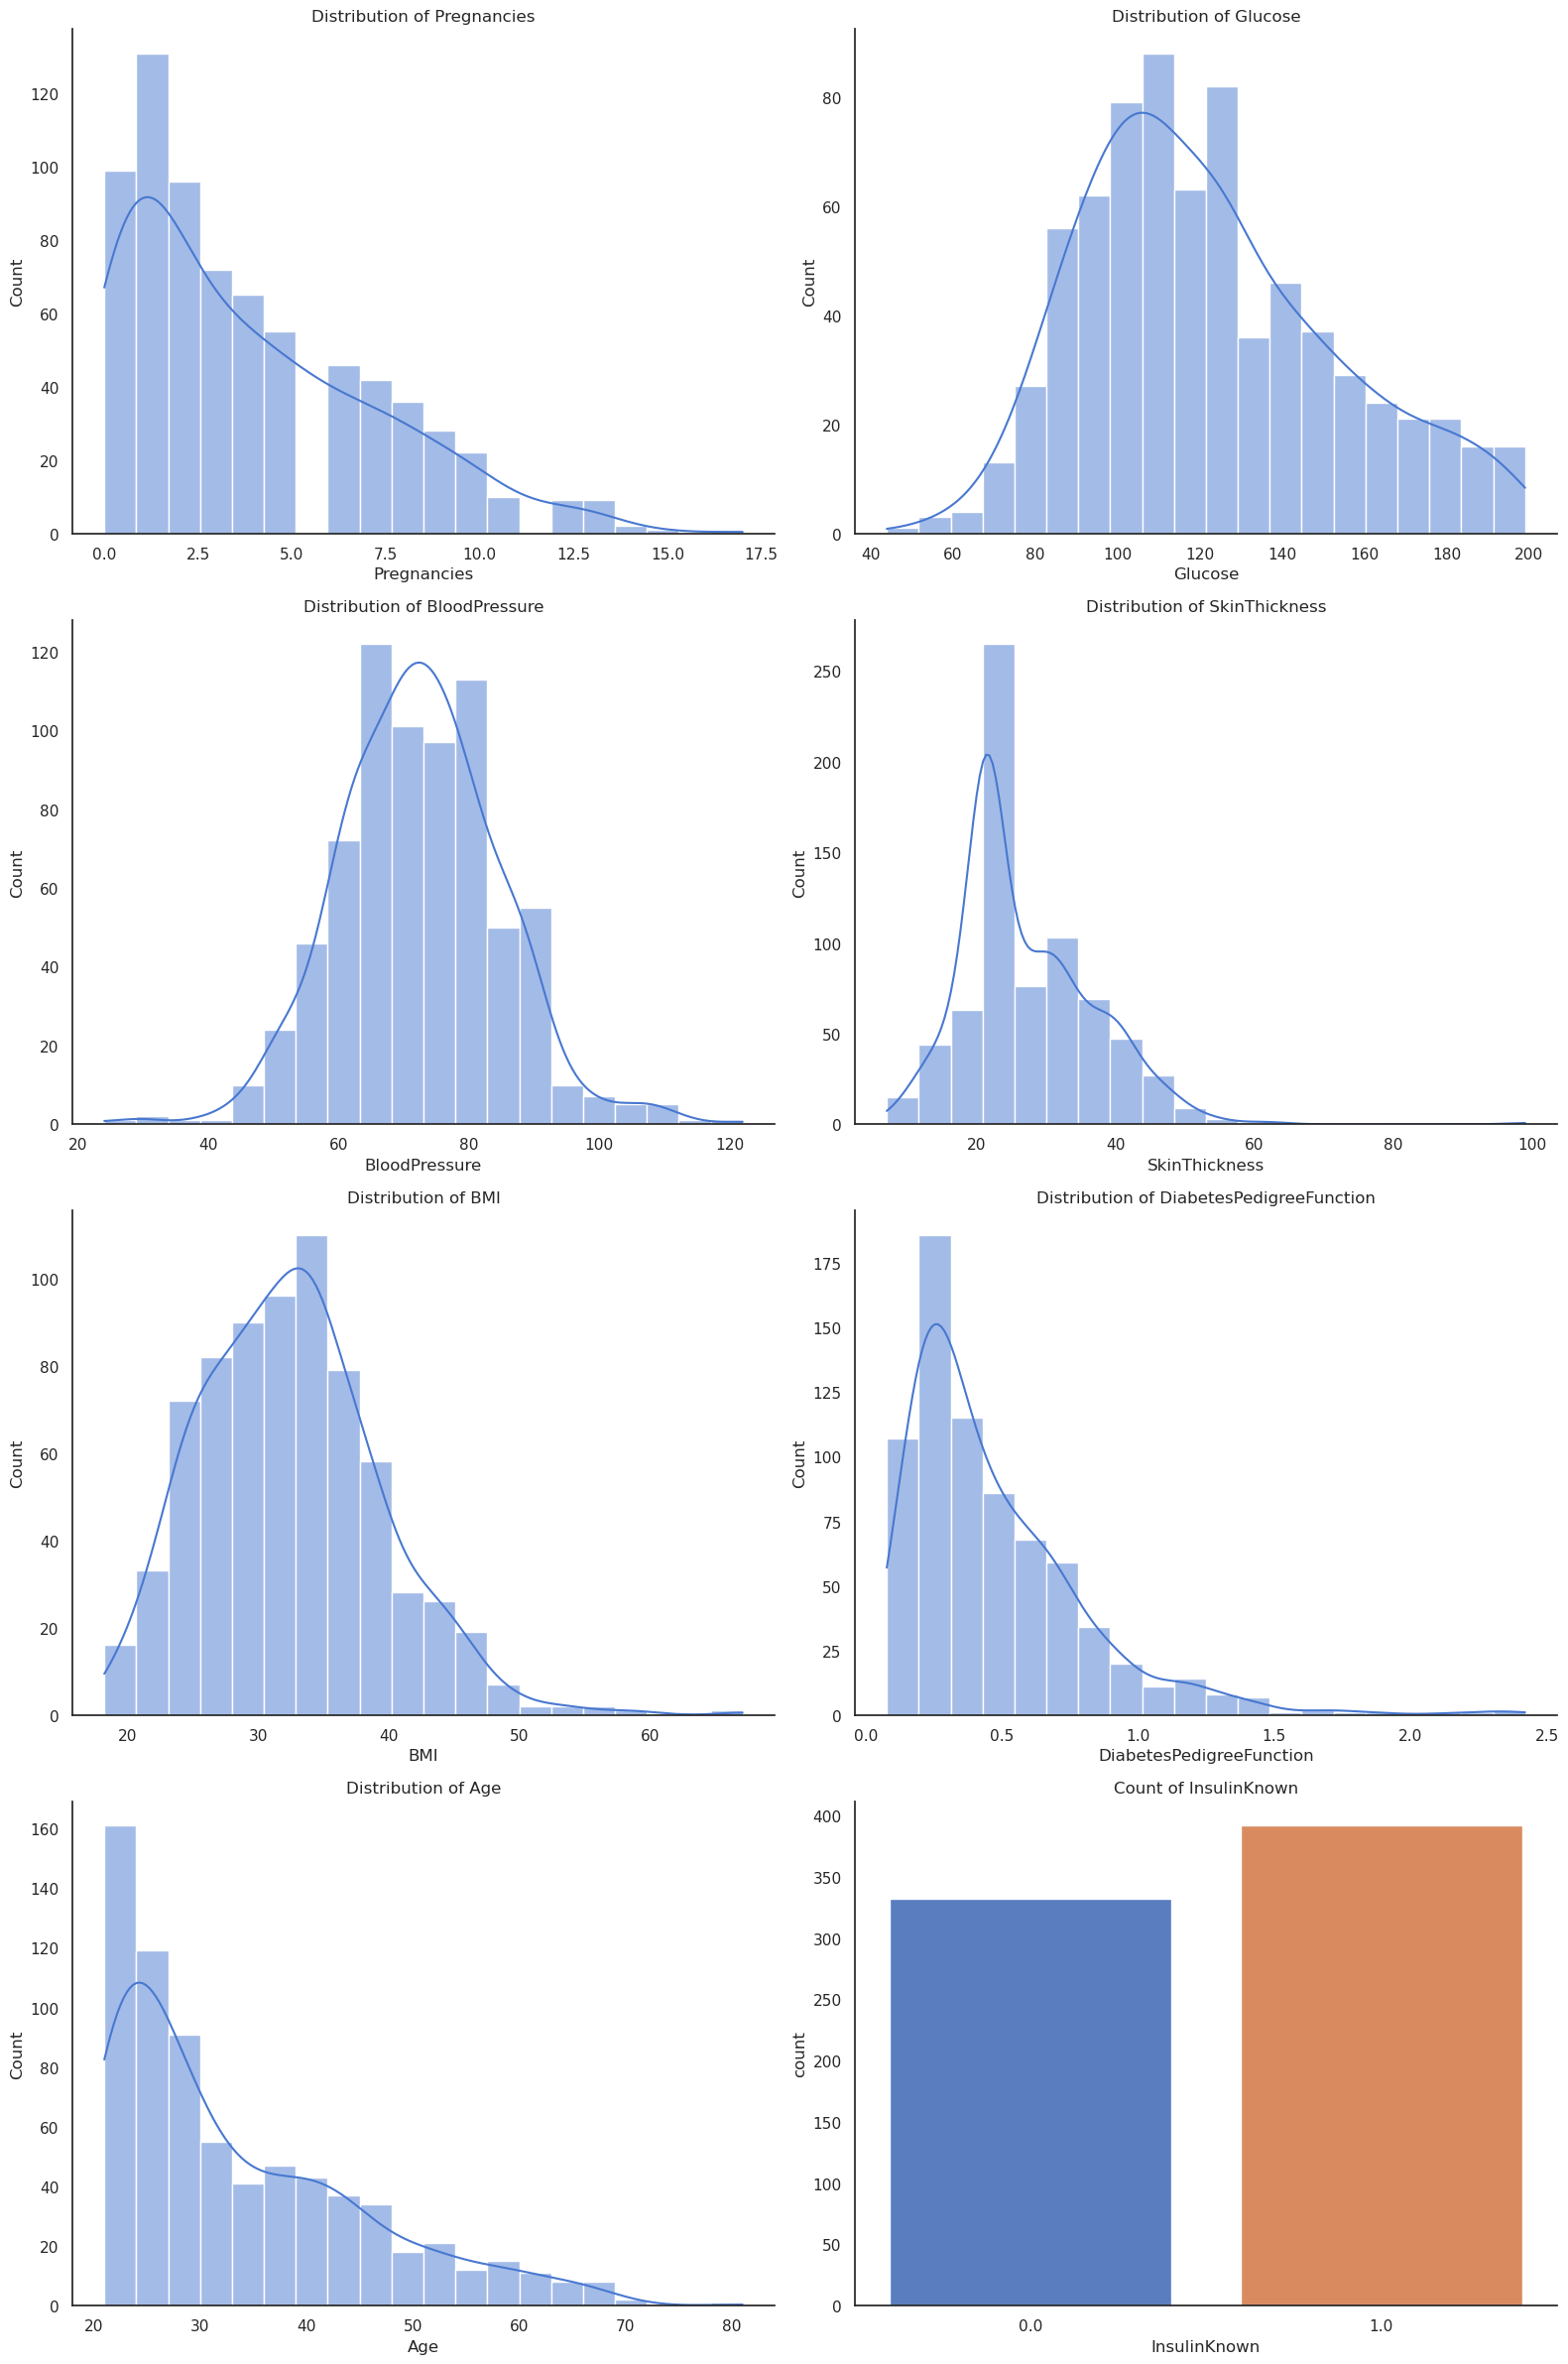

In [17]:
# Filter out the columns that should not be included in the histogram plots
columns_to_plot = [col for col in diabetes_cleaned.columns if col not in ['Outcome', 'InsulinKnown']] 

# Number of columns to display histograms in
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) + num_cols) // num_cols

plt.figure(figsize=(16, num_rows * 6))  # Adjust the height to fit the number of rows

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=diabetes_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

# Add the countplot for InsulinKnown
plt.subplot(num_rows, num_cols, len(columns_to_plot) + 1)
sns.countplot(data=diabetes_cleaned, x='InsulinKnown')
plt.title('Count of InsulinKnown')
sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>The <strong>Glucose</strong> and <strong>Blood Pressure</strong> columns follow a normal distribution.</li>
    <li>The <strong>Age</strong>, <strong>Diabetes Pedigree Function</strong>, and <strong>Pregnancies</strong> columns are right-skewed.</li>
    <li>The right-skewness in the <strong>Age</strong> column suggests that the dataset is biased towards younger participants, which might affect the generalizability of the results to older populations.</li>
    <li>The right-skewness in the <strong>Diabetes Pedigree Function</strong> column implies that most participants have a lower genetic risk of diabetes, with a few individuals having a significantly higher risk.</li>
    <li>The right-skewness in the <strong>Pregnancies</strong> column indicates that most women have fewer pregnancies, with a smaller number of women having a higher number of pregnancies.</li>
    </ul>
</div>

<a id="corr"></a>
### 4.3. Exploring Correlations 

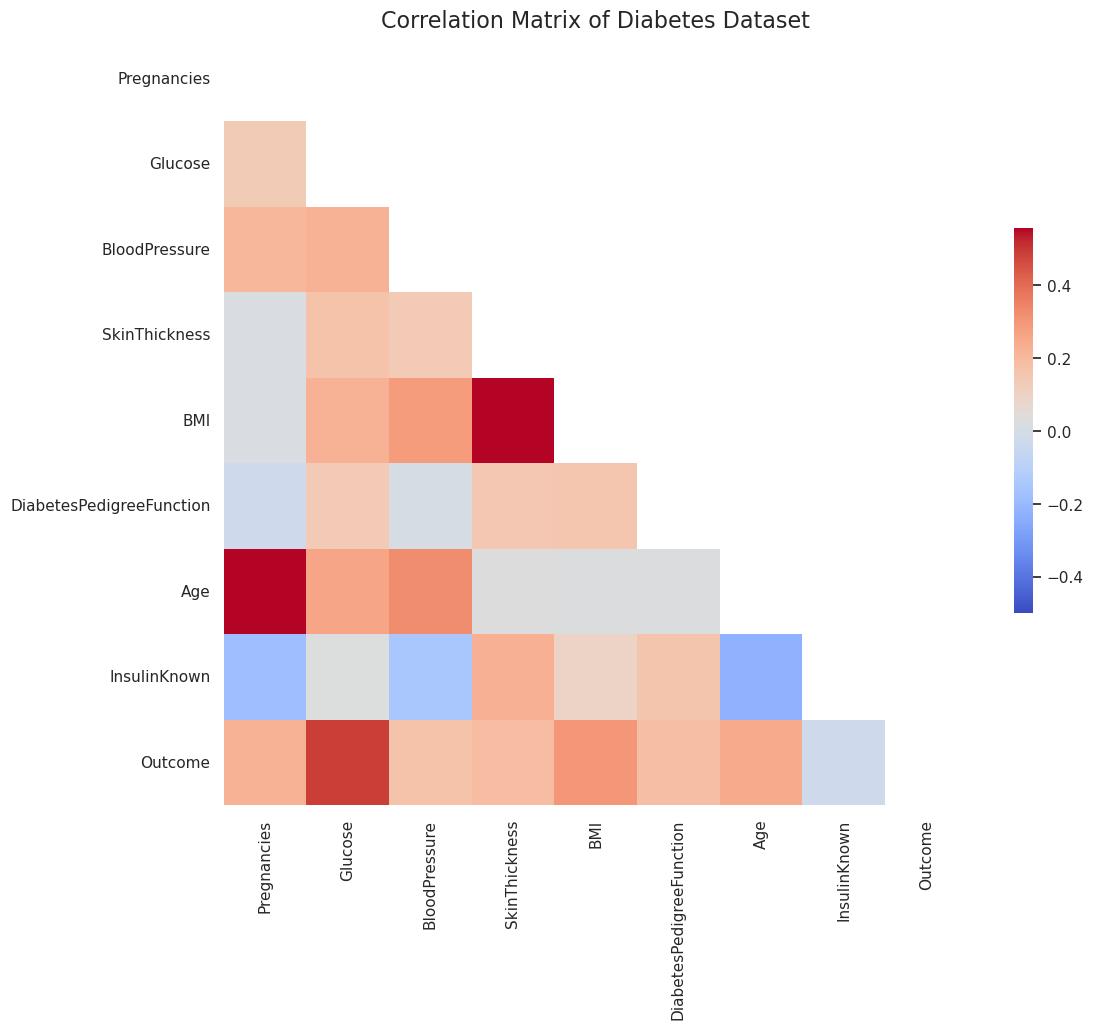

In [18]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(diabetes_cleaned.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(diabetes_cleaned.corr(),cmap='coolwarm', cbar_kws={"shrink": .5}, vmin=-0.5, mask=mask)

# Add a title to the heatmap
plt.title('Correlation Matrix of Diabetes Dataset', fontsize=16)

plt.show()

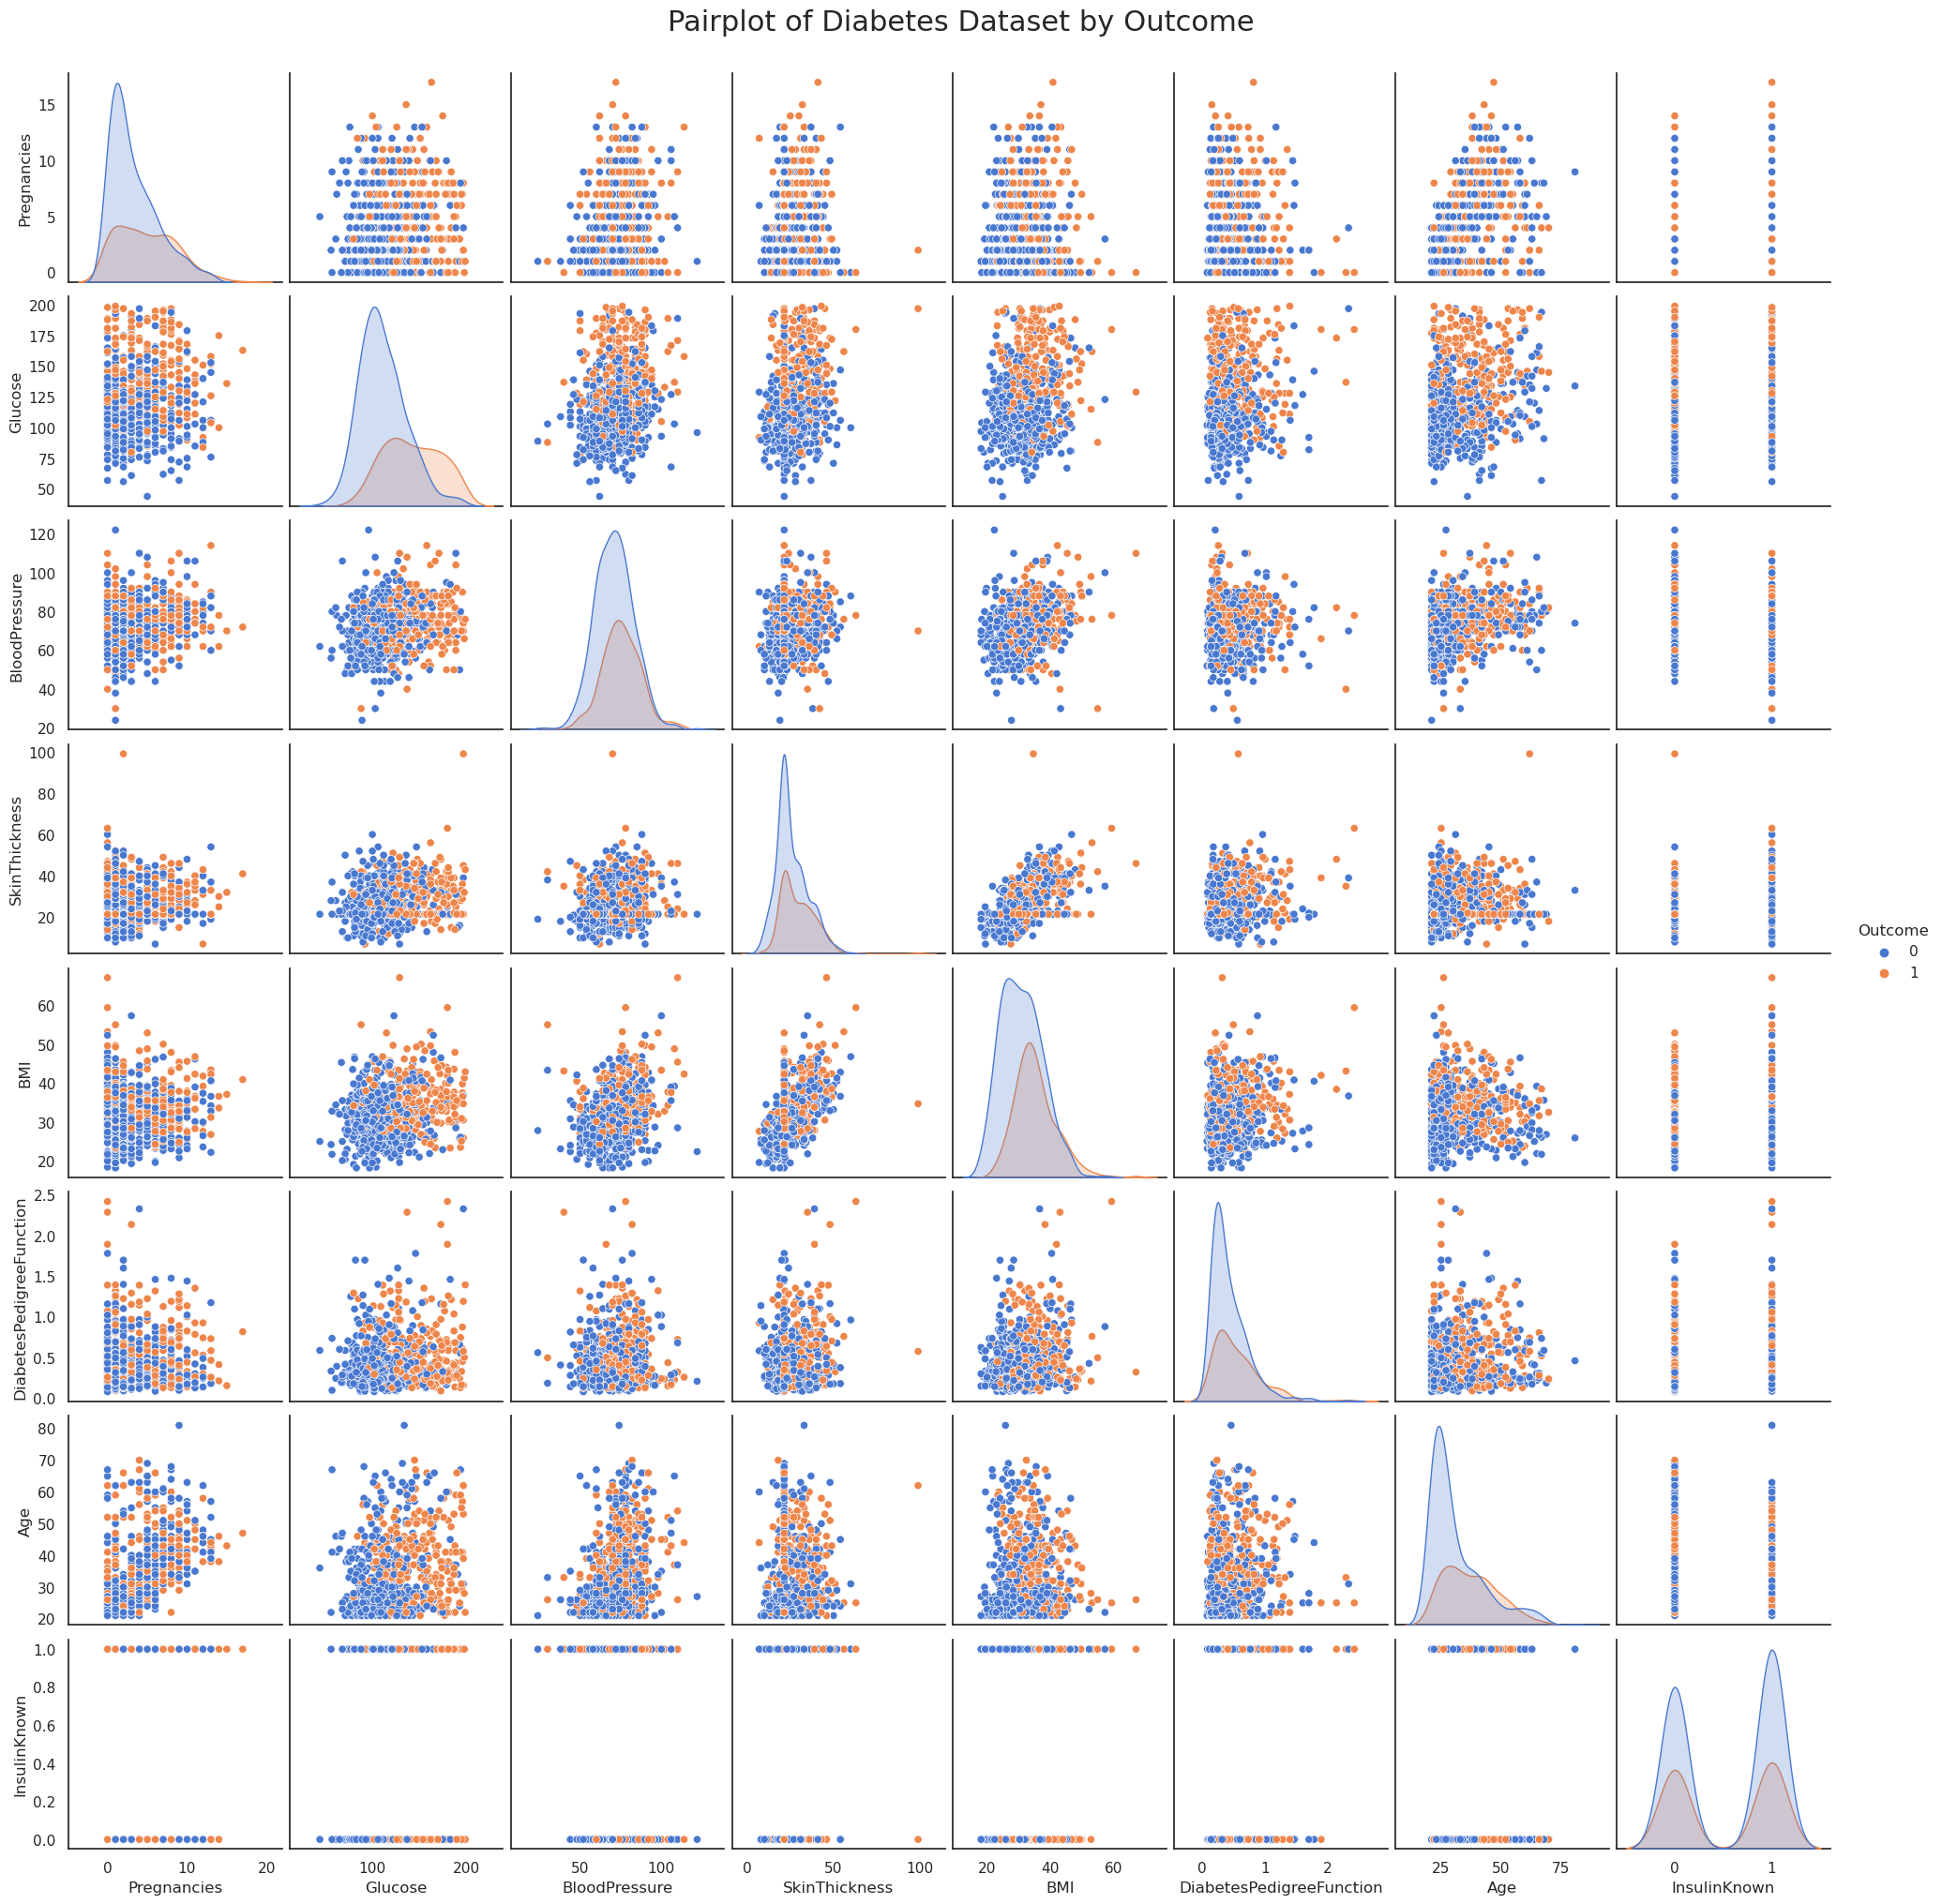

In [19]:
pairplot = sns.pairplot(diabetes_cleaned, hue='Outcome')
pairplot.figure.suptitle('Pairplot of Diabetes Dataset by Outcome', fontsize=22, y=1.02)
plt.show()

<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>The highest correlations are observed between:
            <ul>
                <li><strong>BMI</strong> and <strong>SkinThickness</strong>. This suggests that individuals with higher BMI tend to have greater skinfold thickness, which can be an indicator of overall body fat.</li>
                <li><strong>Age</strong> and <strong>Number of Pregnancies</strong>. This is expected, as older women are likely to have had more pregnancies.</li>
                <li><strong>Outcome</strong> (diabetes diagnosis) and <strong>Glucose</strong>. This indicates that higher glucose levels are strongly associated with a diabetes diagnosis, reinforcing the importance of glucose monitoring in diabetes detection and management.</li>
            </ul>
        </li>
        <li>There are noticeable tendencies in scatterplots with hue, where orange dots represent observations with diabetes and blue dots represent cases without diabetes. Specifically, the division is clear in the <strong>Glucose</strong> scatterplots, which confirms conclusions from the heatmap: people with diabetes tend to have higher glucose levels.</li>
    </ul>
</div>

<a id="outliers"></a>
### 4.4. Exploring Outliers

In [20]:
# Select numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']

# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(diabetes_cleaned[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,724.000,724.000,724.000,724.000,724.000,724.000,724.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.150,-2.535,-3.912,-2.089,-2.072,-1.195,-1.050
25%,-0.853,-0.720,-0.679,-0.590,-0.722,-0.692,-0.795
50%,-0.258,-0.159,-0.032,-0.325,-0.010,-0.288,-0.370
75%,0.635,0.655,0.614,0.609,0.600,0.460,0.651
max,3.908,2.510,4.009,7.457,5.031,5.858,4.053


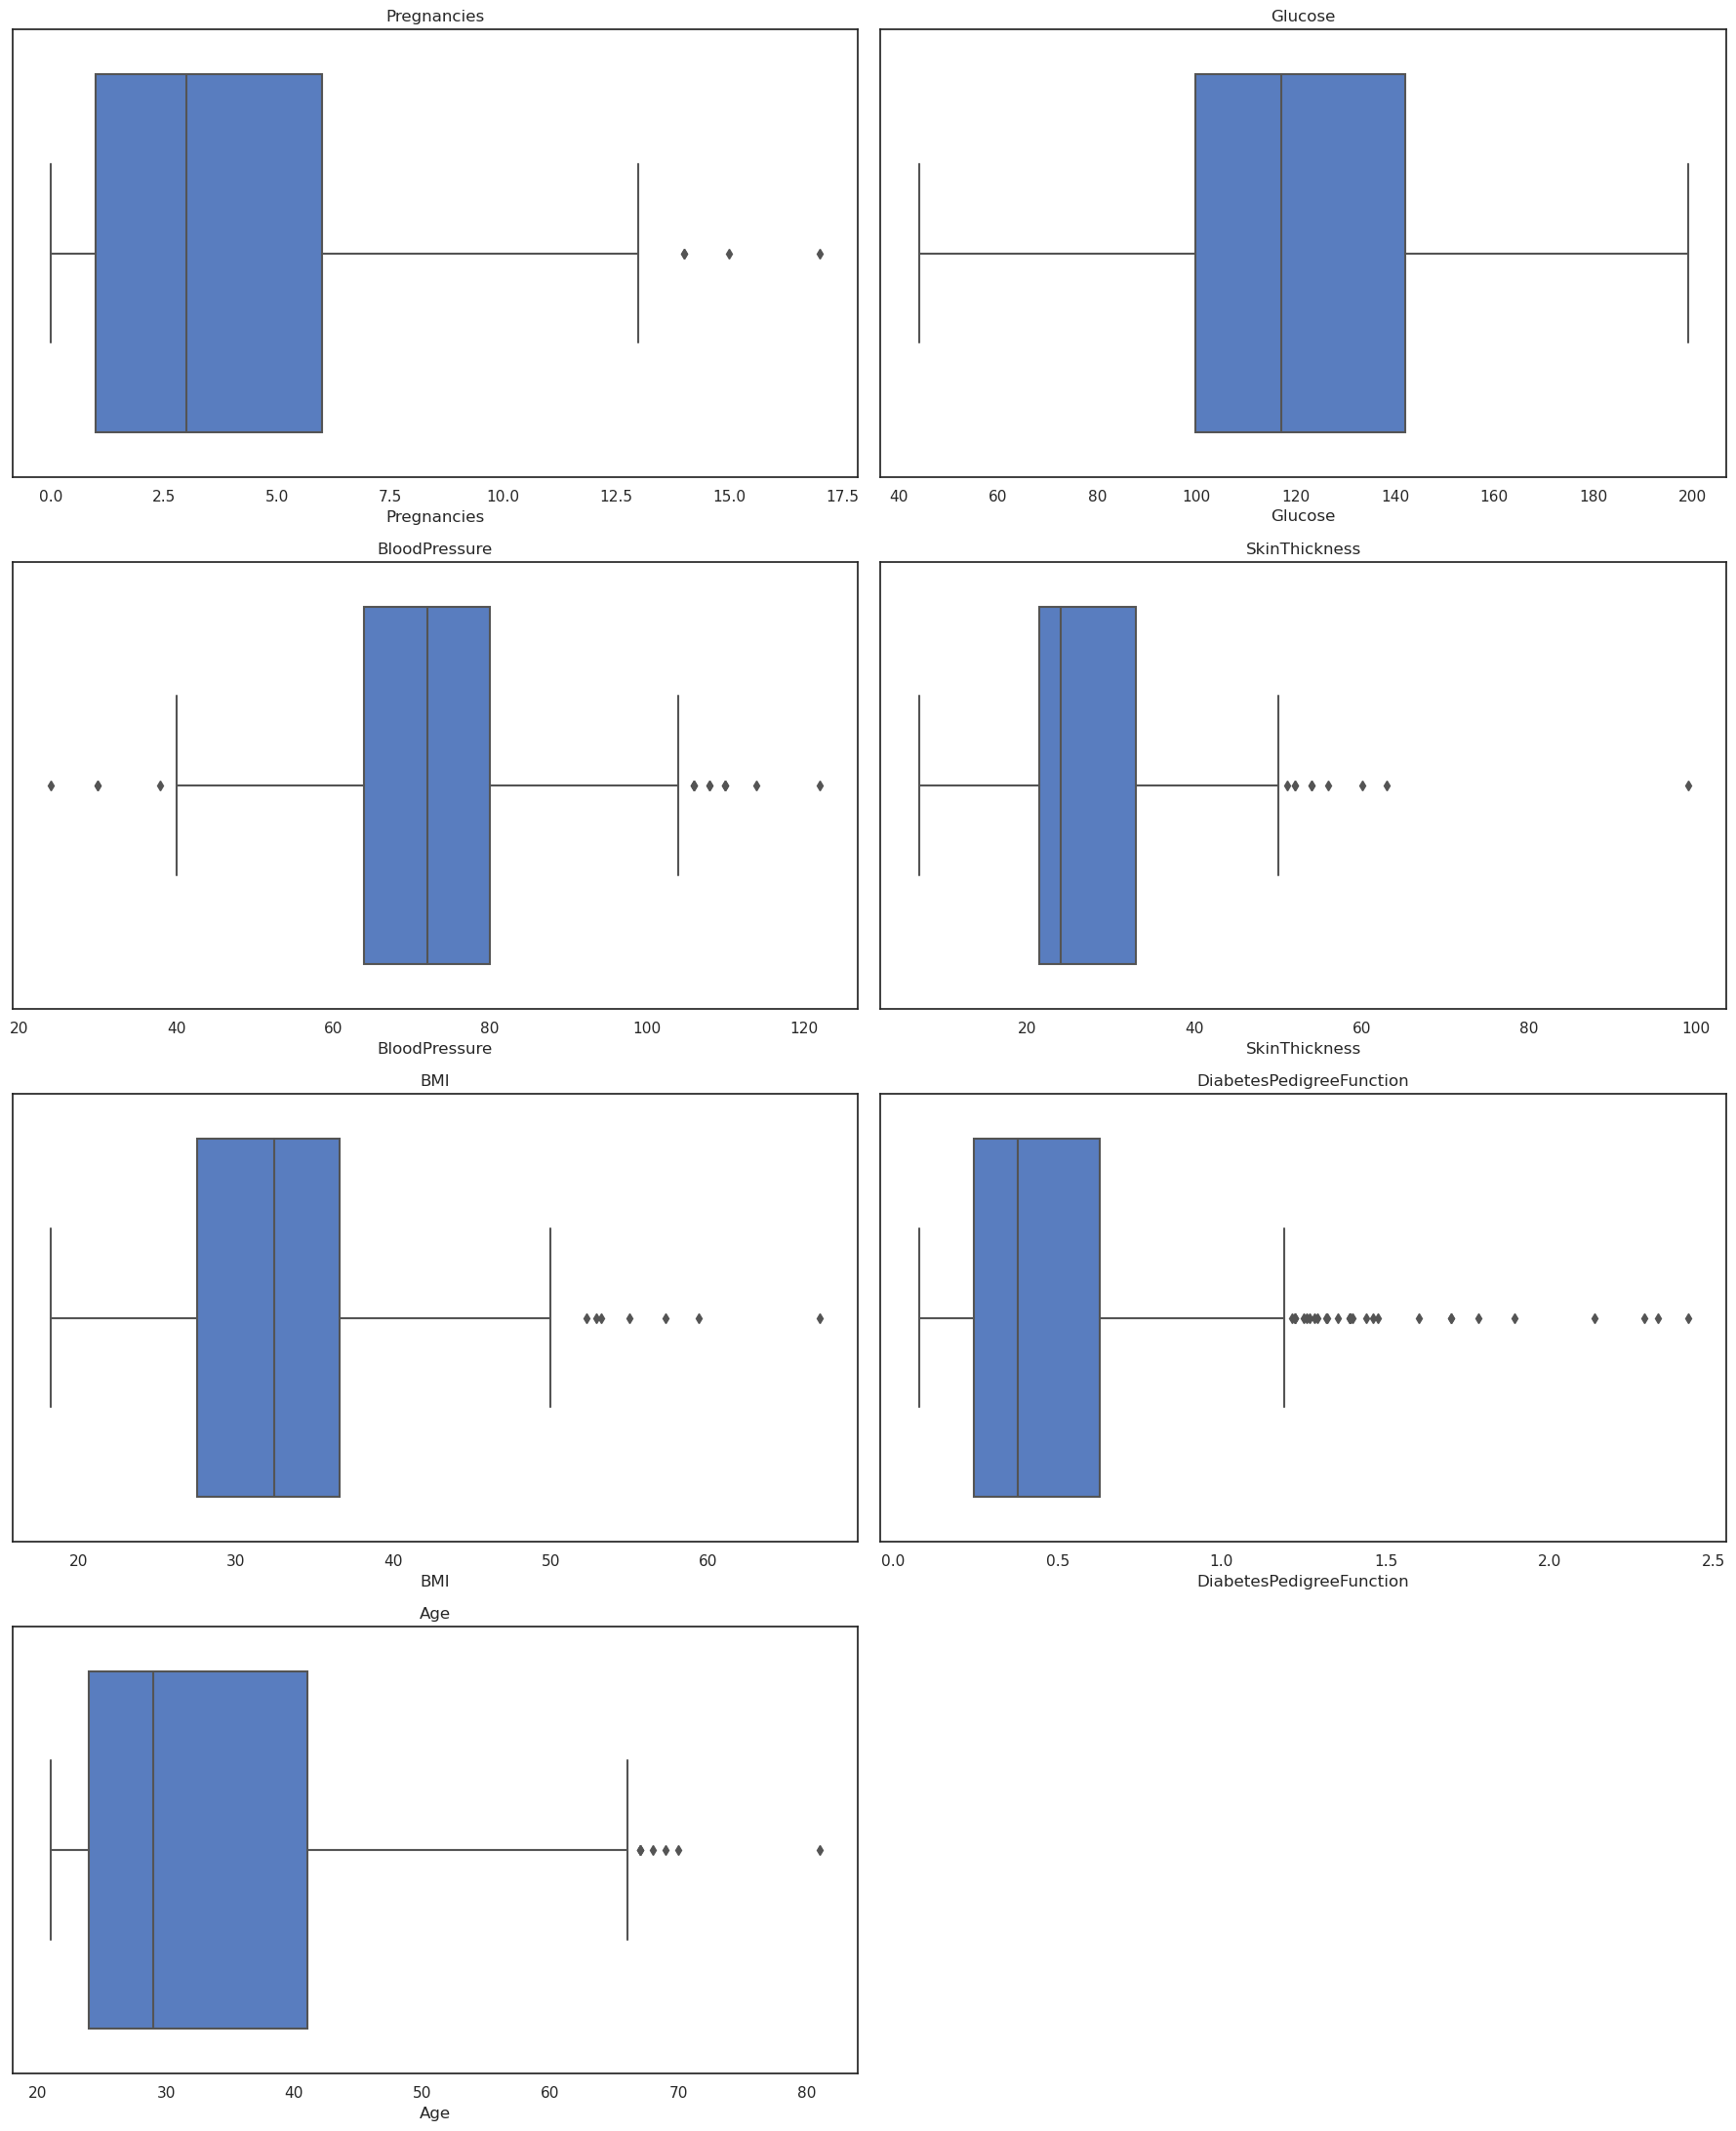

In [21]:
# Create a 4x2 subplot with a figure size of 20x20 inches (only 7 plots will be used)
fig, ax = plt.subplots(4, 2, figsize=(18, 22))

# Flatten the array of axes for easier iteration
ax = ax.flatten()

# Loop through the numerical columns and create a boxplot for each
for idx, column in enumerate(numerical_columns):
    sns.boxplot(ax=ax[idx], x=diabetes_cleaned[column])
    ax[idx].set_title(column)

# Remove the empty subplot (8th plot)
fig.delaxes(ax[-1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>From the z-score analysis and boxplots, we observe outliers in all columns except for Glucose. Let's handle these outliers during the preprocessing step using robust scaling.
        </li>
    </ul>
</div>

<a id='target'></a>
### 4.5. Distribution of a Target Variable 

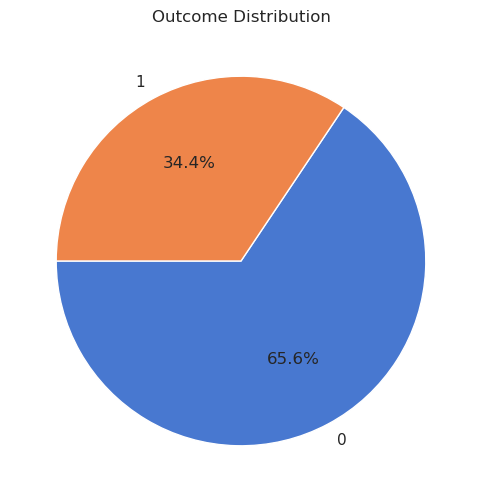

In [22]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = diabetes_cleaned.Outcome.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=180, colors=colors)
plt.title('Outcome Distribution')
plt.show()

<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>Our target variable is <strong>moderately imbalanced</strong>.</li>
    </ul>
</div>

<a id="prepr"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    5. Data Preprocessing
</h2>

<a id='sep'></a>
### 5.1. Separate Features and Target

In [23]:
# Separate features (X) and target variable (y)
X = diabetes_cleaned.loc[:, diabetes_cleaned.columns != "Outcome"]
y = diabetes_cleaned['Outcome']

<a id='split'></a>
### 5.2. Train / Test Split

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a id='scale'></a>
### 5.3. Data Scaling 

In [25]:
# Apply RobustScaler to handle outliers
scaler = RobustScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


<a id="ml"></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    6. Modeling
</h2> 

In [26]:
# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

Decision Tree accuracy: 0.73
Random Forest accuracy: 0.75
Gradient Boosting accuracy: 0.79
AdaBoost accuracy: 0.77
K-Nearest Neighbors accuracy: 0.77
Logistic Regression accuracy: 0.81
SGD Classifier accuracy: 0.72
Support Vector Machine accuracy: 0.78
XGBoost accuracy: 0.73
CatBoost accuracy: 0.78


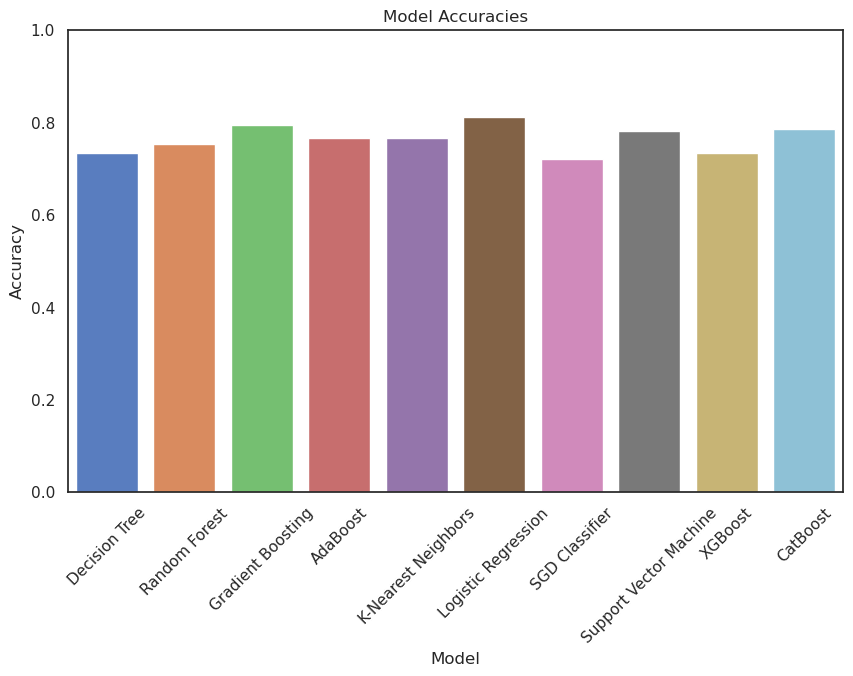

In [27]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='muted')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

<a id='lr'></a>
### 6.1. Logistic Regression 

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.7648
Accuracy = 0.8119, F1-score = 0.7800
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       146
           1       0.75      0.65      0.70        72

    accuracy                           0.81       218
   macro avg       0.79      0.77      0.78       218
weighted avg       0.81      0.81      0.81       218



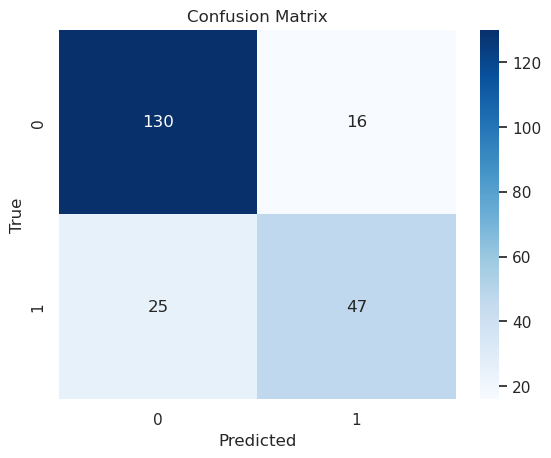

In [28]:
# Define your chosen model
model = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
lr_model = grid_search.best_estimator_
y_pred = lr_model.predict(X_test_scaled)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='knn'></a>
### 6.2. KNeighbors Classifier 

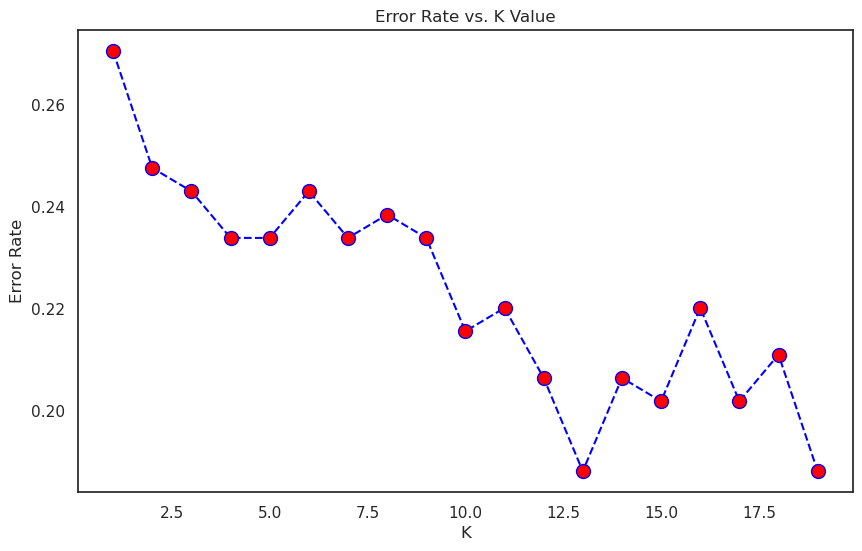

In [29]:
# Choose the best K value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rates versus the K values
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Accuracy = 0.8119, F1-score = 0.7818
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       146
           1       0.74      0.67      0.70        72

    accuracy                           0.81       218
   macro avg       0.79      0.78      0.78       218
weighted avg       0.81      0.81      0.81       218



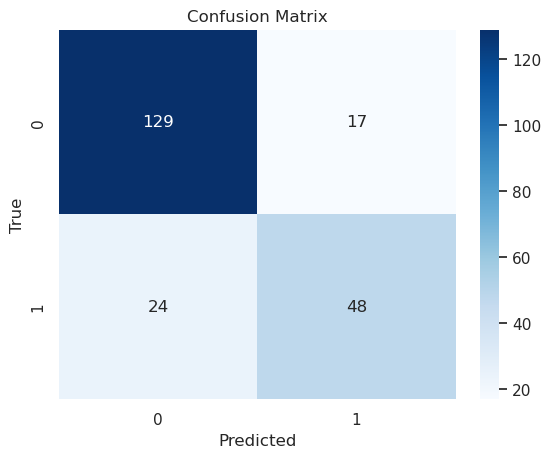

In [30]:
# Define and fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='gbc'></a>
### 6.3. Gradient Boosting Classifier 

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.7767
Accuracy = 0.7431, F1-score = 0.7054
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       146
           1       0.62      0.58      0.60        72

    accuracy                           0.74       218
   macro avg       0.71      0.70      0.71       218
weighted avg       0.74      0.74      0.74       218



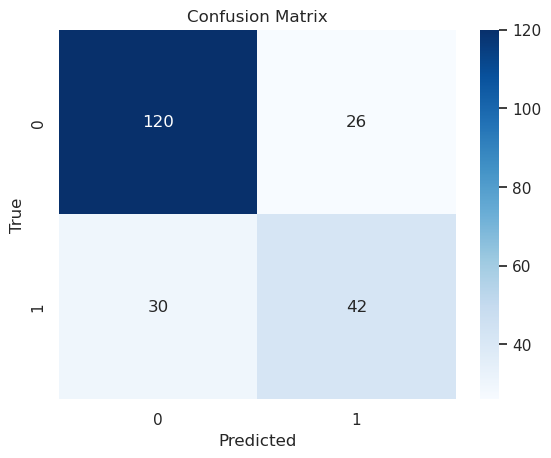

In [31]:
# Define Gradient Boosting model
model = GradientBoostingClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
gb_model = grid_search.best_estimator_
y_pred = gb_model.predict(X_test_scaled)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<a id='cbc'></a>
### 6.4. CatBoost Classifier 

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'depth': 7, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best cross-validation accuracy: 0.7787
Accuracy = 0.7844, F1-score = 0.7479
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       146
           1       0.70      0.61      0.65        72

    accuracy                           0.78       218
   macro avg       0.76      0.74      0.75       218
weighted avg       0.78      0.78      0.78       218



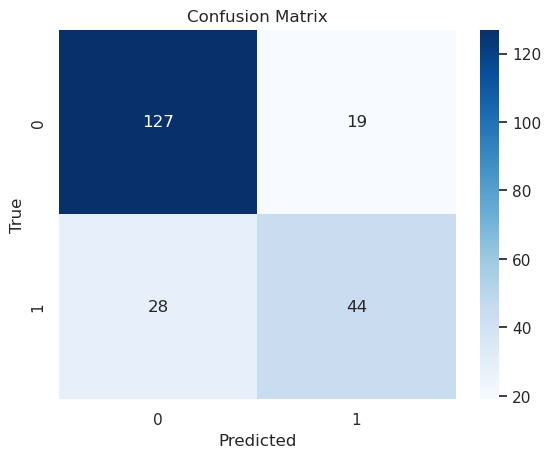

In [32]:
# Define CatBoost model
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
cat_model = grid_search.best_estimator_
y_pred = cat_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='stacking'></a>
### 6.5. Combining Models with Stacking Classifier

Validation Accuracy = 0.7353, F1-score = 0.6843
Test Accuracy = 0.8028, F1-score = 0.7712
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       146
           1       0.72      0.65      0.69        72

    accuracy                           0.80       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.80      0.80      0.80       218



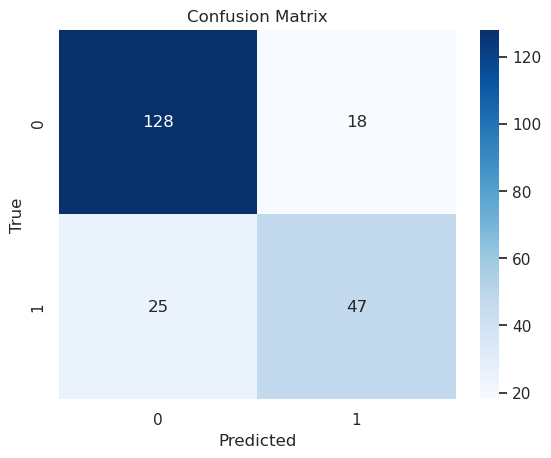

In [33]:
# Split training data to create a validation set for stacking
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define meta-model
meta_model = LogisticRegression()

# Create a list of (name, model) tuples
models = [('logreg', lr_model), ('knn', knn_model), ('gbc', gb_model), ('catboost', cat_model)]

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=models, final_estimator=meta_model, cv=5)

# Train the Stacking Classifier
stacking_clf.fit(X_train_base, y_train_base)

# Predict with the Stacking Classifier on validation set
y_val_pred = stacking_clf.predict(X_val)

# Evaluate the performance on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Accuracy = {val_accuracy:.4f}, F1-score = {val_f1:.4f}")

# Predict with the Stacking Classifier on test set
y_pred = stacking_clf.predict(X_test_scaled)

# Evaluate the performance on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id='conclusions'></a>

<a id="1"></a>
<h2 style="text-align: center; 
            border-radius: 15px; 
            padding: 10px; 
            color: #ffffff; 
            margin: 0; 
            font-size: 150%; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            background-color: #28527a; 
            overflow: hidden; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.15);">
    7. Conclusions
</h2>

<div style="padding: 20px; 
            border: 2px solid #c47a30; 
            border-radius: 12px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); 
            background-color: #fdf8f4;">
    <ul style="font-size: 18px; 
               font-family: 'Segoe UI', Tahoma, Geneva, sans-serif; 
               line-height: 1.6; 
               color: #333333;">
        <li>The best-performing models were <strong>Logistic Regression</strong> and <strong>KNN.</strong></li>
        <li>Their simplicity and reduced risk of overfitting made them more effective than complex algorithms, especially with our limited dataset.</li>
    </ul>
</div>

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>